In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Group_5_data_cleaned.csv")
df.head()

,Unnamed: 0,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Winter,is_Spring,is_Summer,is_Autumn,is_Holiday,is_Functioning_day,Month,Day,int_date
0,0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
1,1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
2,2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
3,3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0
4,4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,True,False,False,False,False,True,12.0,0,43068.0


In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
X = df.drop('Rented Bike Count',axis=1)
y = df['Rented Bike Count']

In [5]:
#Min Max scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
model=scaler.fit(X)
scaled_X=model.transform(X)

y = y.values.reshape(-1, 1)
model1=scaler.fit(y)
scaled_y=model1.transform(y)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
#splitting data into train,validation and test datasets
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=1111)

In [7]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=1111)

In [8]:
# shapes of train,validation and  test split
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(7008, 17)
(7008, 1)
(876, 17)
(876, 1)
(876, 17)
(876, 1)


(None, None)

# SVM with linear kernel

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [10]:
model = SVR(kernel="linear")
model.fit(X_train,y_train)

SVR(kernel='linear')

In [11]:
y_test_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_pred, y_test)
print("MSE:", mse)

MSE: 0.015256137740196695


In [13]:
model.score(X_test, y_test)

0.5553359237748904

In [14]:
y_train_pred = model.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.014811153422639053
The mean absolute error is 0.09087244333723549
The root mean sqaured error is 0.12170108225746824


In [15]:
#model on the validation dataset
y_valid_pred = model.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.012824440822983762
The mean absolute error is 0.08600131040863511
The root mean sqaured error is 0.11324504767531232


In [16]:
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.015256137740196695
The mean absolute error is 0.09285999321283496
The root mean sqaured error is 0.12351573883597465


R^2 is 0.5553359237748904
RMSE is: 0.12351573883597465


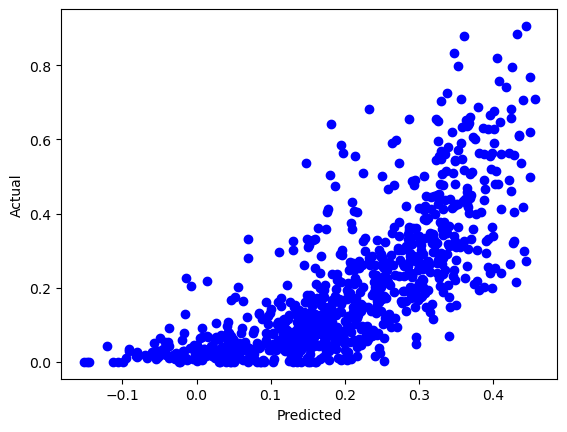

In [17]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {model.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')

# Hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV

parameters_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear']} 

grid = GridSearchCV(SVR(), 
                    parameters_grid, 
                    refit = True, 
                    verbose = 3
                   )

grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.560 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.528 total time=   0.6s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.539 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.543 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.575 total time=   0.6s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.560 total time=   0.5s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.528 total time=   0.5s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.539 total time=   0.5s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.543 total time=   0.5s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.575 total time=   0.6s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.560 total time=   0.6s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=3)

In [19]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [20]:
# best model 
best_model_linear = SVR(kernel="linear",C=1,gamma=1)
best_model_linear.fit(X_train,y_train)
filename = 'svm_lin_co.sav'
pickle.dump(best_model_linear, open(filename, 'wb'))

In [21]:
# best model on validation data
y_valid_pred = best_model_linear.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
r2_score = metrics.r2_score(y_valid_pred,y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")

The mean squared error is 0.012824440822983762
The mean absolute error is 0.08600131040863511
The root mean sqaured error is 0.11324504767531232
The regression score is 0.2677449271258193


In [22]:
# best model on test data
y_test_pred = best_model_linear.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")

The mean squared error is 0.015256137740196695
The mean absolute error is 0.09285999321283496
The root mean sqaured error is 0.12351573883597465
The regression score is 0.07172551431090768


# SVM with nonlinear kernel

In [23]:
model = SVR(kernel="poly")
model.fit(X_train,y_train)

SVR(kernel='poly')

In [24]:
y_test_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_pred, y_test)
print("MSE:", mse)

MSE: 0.00869012265481351


In [26]:
model.score(X_test, y_test)

0.7467127376279361

In [27]:
y_train_pred = model.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.007753219294623688
The mean absolute error is 0.06523672376946675
The root mean sqaured error is 0.08805236677468521


In [28]:
#model on the validation dataset
y_valid_pred = model.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.007076995604392567
The mean absolute error is 0.06303238036440541
The root mean sqaured error is 0.08412488100670673


In [29]:
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

The mean squared error is 0.00869012265481351
The mean absolute error is 0.06984734760497383
The root mean sqaured error is 0.09322082736606402


R^2 is 0.7467127376279361
RMSE is: 0.09322082736606402


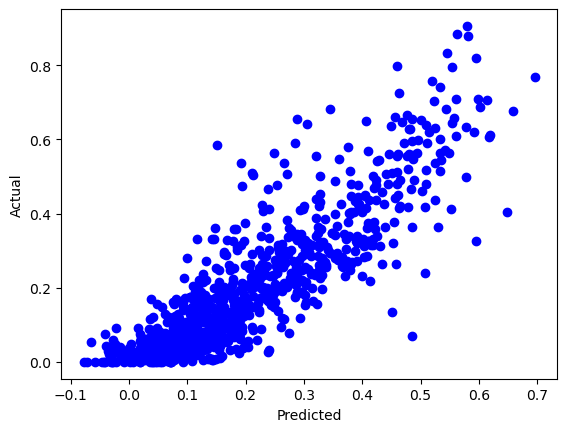

In [30]:
plt.scatter(y_test_pred,y_test,color='b')
plt.xlabel('Predicted')
plt.ylabel('Actual')
print(f'R^2 is {model.score(X_test,y_test)}\nRMSE is: {metrics.mean_squared_error(y_test_pred,y_test,squared=False)}')

# Hyper parameters selection

In [31]:
from sklearn.model_selection import GridSearchCV
parameters_grid = { 'C' :[0.1,1,10],
              'degree': [1],
              'kernel': ['poly']} 
grid = GridSearchCV(SVR(), parameters_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.556 total time=   1.0s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.524 total time=   1.0s
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.537 total time=   1.0s
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.539 total time=   0.9s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.573 total time=   1.1s
[CV 1/5] END ........C=1, degree=1, kernel=poly;, score=0.561 total time=   1.1s
[CV 2/5] END ........C=1, degree=1, kernel=poly;, score=0.529 total time=   0.7s
[CV 3/5] END ........C=1, degree=1, kernel=poly;, score=0.540 total time=   0.7s
[CV 4/5] END ........C=1, degree=1, kernel=poly;, score=0.545 total time=   0.7s
[CV 5/5] END ........C=1, degree=1, kernel=poly;, score=0.577 total time=   0.7s
[CV 1/5] END .......C=10, degree=1, kernel=poly;, score=0.561 total time=   1.1s
[CV 2/5] END .......C=10, degree=1, kernel=poly;,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [1], 'kernel': ['poly']},
             verbose=3)

In [32]:
grid.best_params_

{'C': 10, 'degree': 1, 'kernel': 'poly'}

In [33]:
# best model 
best_model_non_linear = SVR(kernel="poly",C=10,degree=1)
best_model_non_linear.fit(X_train,y_train)
filename = 'svm_non_lin_co.sav'
pickle.dump(best_model_non_linear, open(filename, 'wb'))

In [34]:
# best model on validation data
y_valid_pred = best_model_non_linear.predict(X_valid)
MSE = metrics.mean_squared_error(y_valid_pred, y_valid)
MAE =  metrics.mean_absolute_error(y_valid_pred, y_valid)
r2_score = metrics.r2_score(y_valid_pred,y_valid)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")

The mean squared error is 0.012818269618165751
The mean absolute error is 0.08599254688592693
The root mean sqaured error is 0.11321779726776948
The regression score is 0.2707896900012926


In [35]:
# best model on test data
y_test_pred = best_model_non_linear.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
r2_score = metrics.r2_score(y_test_pred,y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")
print(f"The regression score is {r2_score}")

The mean squared error is 0.015247701447414731
The mean absolute error is 0.09283853954732617
The root mean sqaured error is 0.12348158343418962
The regression score is 0.07639046078232259


# Deep Learning model

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,scaled_y, test_size = 0.2, random_state = 1111)

In [38]:
model = Sequential()
model.add(Dense(128, input_dim=17, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs =100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,625
Trainable params: 10,625
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
176/176 [==============================] - 0s 900us/step - loss: 0.0176 - mae: 0.0945 - val_loss: 0.0099 - val_mae: 0.0720
Epoch 2/100
176/176 [==============================] - 0s 582us/step - loss: 0.0114 - mae: 0.0752 - val_loss: 0.0088 - val_mae: 0.0664
Epoch 3/100
176/176 [=========================

176/176 [==============================] - 0s 584us/step - loss: 0.0030 - mae: 0.0362 - val_loss: 0.0032 - val_mae: 0.0382
Epoch 56/100
176/176 [==============================] - 0s 576us/step - loss: 0.0028 - mae: 0.0345 - val_loss: 0.0027 - val_mae: 0.0339
Epoch 57/100
176/176 [==============================] - 0s 579us/step - loss: 0.0027 - mae: 0.0344 - val_loss: 0.0028 - val_mae: 0.0347
Epoch 58/100
176/176 [==============================] - 0s 577us/step - loss: 0.0028 - mae: 0.0348 - val_loss: 0.0028 - val_mae: 0.0355
Epoch 59/100
176/176 [==============================] - 0s 582us/step - loss: 0.0029 - mae: 0.0359 - val_loss: 0.0028 - val_mae: 0.0361
Epoch 60/100
176/176 [==============================] - 0s 596us/step - loss: 0.0027 - mae: 0.0340 - val_loss: 0.0031 - val_mae: 0.0352
Epoch 61/100
176/176 [==============================] - 0s 587us/step - loss: 0.0027 - mae: 0.0343 - val_loss: 0.0030 - val_mae: 0.0368
Epoch 62/100
176/176 [==============================] - 0s 58

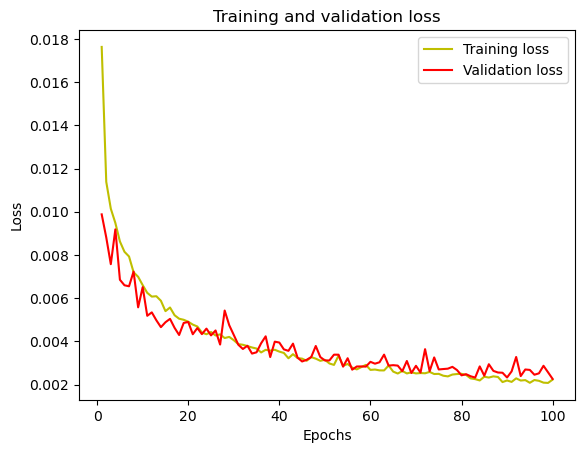

In [39]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

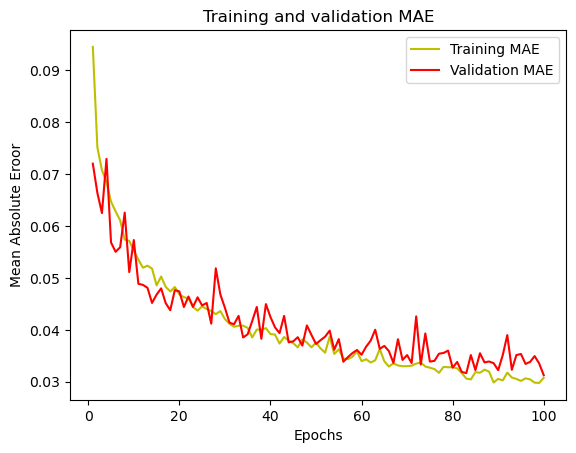

In [40]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Eroor')
plt.legend()
plt.show()

In [41]:
#Predict on test data
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 50ms/step
Predicted values are:  [[0.11229841]
 [0.08164453]
 [0.09393531]
 [0.4839936 ]
 [0.08766687]]
Real values are:  [[0.12739033]
 [0.10461192]
 [0.12992126]
 [0.47412823]
 [0.07367829]]


In [42]:
y_train_pred = model.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

219/219 [==============================] - 0s 334us/step
The mean squared error is 0.0018371392918204393
The mean absolute error is 0.027715861056878555
The root mean sqaured error is 0.04286186290655645


In [43]:
# We decalred a function for creating a model.
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
def build_model3_five_hidden_layers():
    
    model = Sequential()

    model.add(Dense(32, input_shape = (X_train.shape[1],)))    
    
    model.add(Dense(64,Activation('relu')))                         
    
    model.add(Dense(64, Activation('relu')))                         
    
    
    model.add(Dense(64, Activation('relu')))                         
    
    
    model.add(Dense(64, Activation('relu')))                         
    
    
    model.add(Dense(64, Activation('relu')))                         

    
    model.add(Dense(1))                        
    learning_rate = 0.001
    optimizer = optimizers.RMSprop(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) 
    
    return model

model3 = build_model3_five_hidden_layers()
print('Here is a summary of this model: ')
model3.summary()
history = model3.fit(X_train, y_train, validation_split=0.2, epochs =100)

Here is a summary of this model: 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                576       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)    

176/176 [==============================] - 0s 719us/step - loss: 0.0028 - mae: 0.0341 - mse: 0.0028 - mape: 327238.0000 - val_loss: 0.0059 - val_mae: 0.0513 - val_mse: 0.0059 - val_mape: 229123.8594
Epoch 34/100
176/176 [==============================] - 0s 707us/step - loss: 0.0029 - mae: 0.0341 - mse: 0.0029 - mape: 328829.0625 - val_loss: 0.0058 - val_mae: 0.0515 - val_mse: 0.0058 - val_mape: 225796.0781
Epoch 35/100
176/176 [==============================] - 0s 705us/step - loss: 0.0028 - mae: 0.0334 - mse: 0.0028 - mape: 312795.3438 - val_loss: 0.0032 - val_mae: 0.0378 - val_mse: 0.0032 - val_mape: 229425.3906
Epoch 36/100
176/176 [==============================] - 0s 707us/step - loss: 0.0027 - mae: 0.0331 - mse: 0.0027 - mape: 353091.5938 - val_loss: 0.0036 - val_mae: 0.0384 - val_mse: 0.0036 - val_mape: 181994.1094
Epoch 37/100
176/176 [==============================] - 0s 707us/step - loss: 0.0027 - mae: 0.0329 - mse: 0.0027 - mape: 268884.7812 - val_loss: 0.0041 - val_mae: 0.

Epoch 72/100
176/176 [==============================] - 0s 721us/step - loss: 0.0018 - mae: 0.0267 - mse: 0.0018 - mape: 246586.2188 - val_loss: 0.0025 - val_mae: 0.0318 - val_mse: 0.0025 - val_mape: 191807.7500
Epoch 73/100
176/176 [==============================] - 0s 731us/step - loss: 0.0018 - mae: 0.0263 - mse: 0.0018 - mape: 221605.7188 - val_loss: 0.0023 - val_mae: 0.0305 - val_mse: 0.0023 - val_mape: 185368.2812
Epoch 74/100
176/176 [==============================] - 0s 807us/step - loss: 0.0018 - mae: 0.0267 - mse: 0.0018 - mape: 246286.4531 - val_loss: 0.0036 - val_mae: 0.0368 - val_mse: 0.0036 - val_mape: 494242.9062
Epoch 75/100
176/176 [==============================] - 0s 706us/step - loss: 0.0018 - mae: 0.0261 - mse: 0.0018 - mape: 255640.6406 - val_loss: 0.0027 - val_mae: 0.0332 - val_mse: 0.0027 - val_mape: 224855.7188
Epoch 76/100
176/176 [==============================] - 0s 707us/step - loss: 0.0017 - mae: 0.0259 - mse: 0.0017 - mape: 276486.7812 - val_loss: 0.0024 

In [44]:
model3.save("trained.model.h5")

In [45]:
#Predict on train data
predictions = model3.predict(X_train[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_train[:5])

1/1 [==============================] - 0s 35ms/step
Predicted values are:  [[0.12403046]
 [0.18368074]
 [0.08022607]
 [0.06333926]
 [0.09806548]]
Real values are:  [[0.08970754]
 [0.22131609]
 [0.06383577]
 [0.08352081]
 [0.11051744]]


In [46]:
#Predict on test data
predictions = model3.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 9ms/step
Predicted values are:  [[0.10957927]
 [0.08422878]
 [0.13211928]
 [0.52948695]
 [0.08014021]]
Real values are:  [[0.12739033]
 [0.10461192]
 [0.12992126]
 [0.47412823]
 [0.07367829]]


In [47]:
y_train_pred = model3.predict(X_train)
MSE = metrics.mean_squared_error(y_train_pred, y_train)
MAE =  metrics.mean_absolute_error(y_train_pred, y_train)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

219/219 [==============================] - 0s 384us/step
The mean squared error is 0.0013961273295210357
The mean absolute error is 0.022553379935636882
The root mean sqaured error is 0.03736478729393539


In [48]:
y_test_pred = model3.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

55/55 [==============================] - 0s 360us/step
The mean squared error is 0.0026148365214244346
The mean absolute error is 0.02811352093897421
The root mean sqaured error is 0.05113547224211814


In [49]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
95,0.001515,0.023665,0.001515,204766.328125,0.002027,0.028091,0.002027,171613.515625,95
96,0.001496,0.023915,0.001496,228730.359375,0.002965,0.035813,0.002965,167471.703125,96
97,0.001556,0.024016,0.001556,239638.187500,0.002195,0.028699,0.002195,187152.953125,97
98,0.001492,0.023836,0.001492,226214.468750,0.002309,0.030182,0.002309,262021.046875,98
99,0.001433,0.023453,0.001433,236175.750000,0.002227,0.027912,0.002227,218262.484375,99


In [50]:
train_predictions = model3.predict(X_train)
train_predictions.shape

219/219 [==============================] - 0s 368us/step


(7008, 1)

In [51]:
y_train.shape

(7008, 1)

219/219 [==============================] - 0s 385us/step


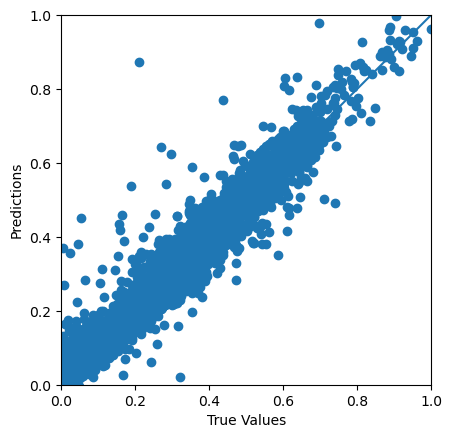

In [52]:
train_predictions = model3.predict(X_train)

a = plt.axes(aspect='equal')
plt.scatter(y_train, train_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

55/55 [==============================] - 0s 351us/step


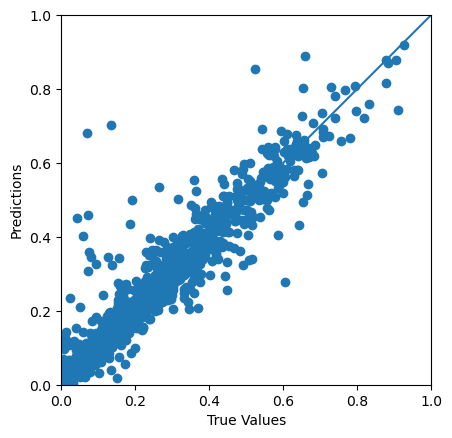

In [53]:
test_predictions = model3.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Hyperparameters Tuning

In [54]:
import kerastuner as kt

# Finding right optimizer

In [55]:
def build_model(hp):
    
    model = Sequential()
    
    model.add(Dense(32,activation='relu',input_dim=17))
    model.add(Dense(1,activation='sigmoid'))
    
    optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
    
    model.compile(optimizer=optimizer,loss='mse', metrics='mse')
                        
    return model
    

In [56]:
tuner = kt.RandomSearch(
    build_model,
    objective='loss',
    max_trials=5,
    overwrite=True)

In [57]:
X_train, X_rem, y_train, y_rem = train_test_split(scaled_X,scaled_y, train_size=0.80,random_state=1111)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=1111)

In [58]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Trial 4 Complete [00h 00m 01s]
loss: 0.014180533587932587

Best loss So Far: 0.013096707873046398
Total elapsed time: 00h 00m 03s
INFO:tensorflow:Oracle triggered exit


In [59]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [60]:
model = tuner.get_best_models(num_models=1)[0]

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                576       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_valid,y_valid))

Epoch 7/100
219/219 [==============================] - 0s 623us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 8/100
219/219 [==============================] - 0s 433us/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 9/100
219/219 [==============================] - 0s 424us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 10/100
219/219 [==============================] - 0s 434us/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 11/100
219/219 [==============================] - 0s 434us/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 12/100
219/219 [==============================] - 0s 474us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 13/100
219/219 [==============================] - 0s 430us/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 14/100
219/219 [=============================

219/219 [==============================] - 0s 456us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 68/100
219/219 [==============================] - 0s 458us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 69/100
219/219 [==============================] - 0s 427us/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 70/100
219/219 [==============================] - 0s 433us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 71/100
219/219 [==============================] - 0s 434us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 72/100
219/219 [==============================] - 0s 447us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 73/100
219/219 [==============================] - 0s 442us/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 74/100
219/219 [==============================] - 0s 42

In [63]:
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

28/28 [==============================] - 0s 422us/step
The mean squared error is 0.007151386475555381
The mean absolute error is 0.058618060945820304
The root mean sqaured error is 0.08456587063086018


# Finding right number of neurons

In [64]:
def build_model(hp):
    
    model = Sequential()
    
    units=hp.Int('units',min_value=8,max_value=128,step=8)
    
    model.add(Dense(units=units,activation='relu',input_dim=17))
    
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',loss='mse', metrics=['mse'])
    
    return model

In [65]:
tuner = kt.RandomSearch(
    build_model,
    objective='loss',
    max_trials=5,
    overwrite=True)

In [66]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 01s]
loss: 0.010972949676215649

Best loss So Far: 0.010972949676215649
Total elapsed time: 00h 00m 04s
INFO:tensorflow:Oracle triggered exit


In [67]:
tuner.get_best_hyperparameters()[0].values

{'units': 120}

In [68]:
model = tuner.get_best_models(num_models=1)[0]

In [69]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_valid,y_valid))

Epoch 7/100
219/219 [==============================] - 0s 622us/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 8/100
219/219 [==============================] - 0s 509us/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 9/100
219/219 [==============================] - 0s 466us/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 10/100
219/219 [==============================] - 0s 467us/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 11/100
219/219 [==============================] - 0s 467us/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 12/100
219/219 [==============================] - 0s 458us/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0090 - val_mse: 0.0090
Epoch 13/100
219/219 [==============================] - 0s 468us/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 14/100
219/219 [=============================

219/219 [==============================] - 0s 432us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 68/100
219/219 [==============================] - 0s 476us/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 69/100
219/219 [==============================] - 0s 434us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 70/100
219/219 [==============================] - 0s 430us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 71/100
219/219 [==============================] - 0s 466us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 72/100
219/219 [==============================] - 0s 460us/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 73/100
219/219 [==============================] - 0s 441us/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 74/100
219/219 [==============================] - 0s 43

In [70]:
y_test_pred = model.predict(X_test)
MSE = metrics.mean_squared_error(y_test_pred, y_test)
MAE =  metrics.mean_absolute_error(y_test_pred, y_test)
RMSE = MSE**0.5
print(f"The mean squared error is {MSE}")
print(f"The mean absolute error is {MAE}")
print(f"The root mean sqaured error is {RMSE}")

28/28 [==============================] - 0s 299us/step
The mean squared error is 0.005074156448161975
The mean absolute error is 0.04542738274494408
The root mean sqaured error is 0.07123311342460033
